<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/W8_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Unsupervised Machine Learning: Dimensionality Reduction

### Example Data

We'll start by using PCA, which is helpful in reducing dimensionality.  Here we use a dataset on types of glass -- useful in criminology where we may need to identify a glass shard by its purpose.  This dataset comes from the UC Irvine Machine Learning Repository; it was created by B. German in Britain's Home Office Forensic Science Service and donated by Dr. Vina Spiehler of Diagnostic Products Corporation.  You can read more about it at:

https://archive.ics.uci.edu/ml/datasets/glass+identification



We will start by downloading the data from where it is shared in Google Drive.

In [1]:
!pip install googledrivedownloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/
gdd.download_file_from_google_drive(file_id='1b1C1AlZmqada3ncYWVqJd8zQIWphOo_K',
                                    dest_path='/content/glass.csv')

In [3]:
!head glass.csv

ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1
7,1.51743,13.3,3.6,1.14,73.09,0.58,8.17,0,0,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.3,0,0,1


In [4]:
# Load into a dataframe, with the header in row 0
import pandas as pd

glass_df = pd.read_csv('glass.csv', header=[0])
glass_df

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


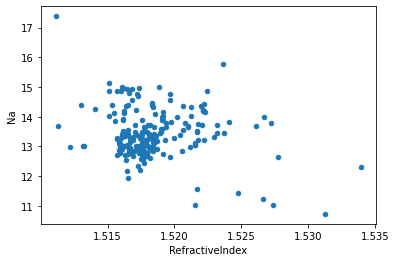

In [5]:
import matplotlib
import matplotlib.pyplot as plt

fig1 = glass_df.plot.scatter(x='RefractiveIndex',y='Na')

In [8]:
# Remove the ID and the Type labels for the training data
X = glass_df.drop(['ID','Type'], axis=1)

# Labels
y = glass_df['Type']  # give back Type as Series

# Let's see the data
X

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


2.1.1 Principal Components Analysis (PCA)

We will now use **PCA** to reduce the number of dimensions in the data.

Best practice for PCA is to scale the data...

In [9]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features based on unit variance
X = StandardScaler().fit_transform(X)
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

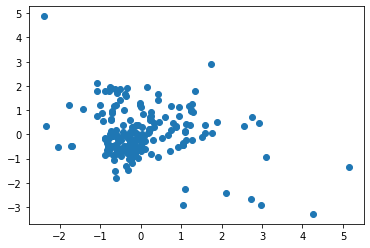

In [10]:
# Re-plotting now with the mean at the center!
plt.scatter(X[:,0], X[:,1])

## 2.1.1 Running PCA

We start by creating an instance of the PCA class, and fit it to the data...

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X2 = pca.fit_transform(X)

In [12]:
# Let's see the components
pca.components_

array([[ 0.54517662, -0.2581256 ,  0.11088095, -0.42870863, -0.22883635,
        -0.21934405,  0.49230609, -0.25037512,  0.18584154],
       [ 0.28568318,  0.27035007, -0.59355826,  0.29521154, -0.15509891,
        -0.15397013,  0.3453798 ,  0.48470218, -0.06203879],
       [ 0.08691083, -0.38491962,  0.00841796,  0.32923712, -0.45870884,
         0.66257412, -0.00098473,  0.07405473,  0.28445055],
       [ 0.14738099,  0.49124204,  0.37878577, -0.13750592, -0.65253771,
        -0.03853544, -0.27644322,  0.13317545, -0.23049202],
       [-0.0735427 ,  0.1536833 ,  0.12350912,  0.01410888,  0.00850012,
        -0.30703984, -0.18818774,  0.25133426,  0.87326405],
       [ 0.11528772, -0.55811757,  0.30818598, -0.01885731,  0.08609797,
        -0.24363237, -0.14866937,  0.65721884, -0.24304431],
       [ 0.08186724,  0.14858006, -0.20604537, -0.69923557,  0.21606658,
         0.50412141, -0.09913463,  0.35178255,  0.07372136],
       [-0.7522159 , -0.12769315, -0.07689061, -0.27444105, -0

In [13]:
X[:,0:2]

array([[ 8.72867646e-01,  2.84953261e-01],
       [-2.49333469e-01,  5.91817180e-01],
       [-7.21318056e-01,  1.49933137e-01],
       [-2.32830512e-01, -2.42852679e-01],
       [-3.12044708e-01, -1.69205338e-01],
       [-7.93931069e-01, -7.58384063e-01],
       [-3.08744117e-01, -1.32381668e-01],
       [-2.65836427e-01, -3.16500020e-01],
       [ 2.68859399e-01,  7.75935532e-01],
       [-2.69137018e-01, -5.00618371e-01],
       [-8.76445857e-01, -8.44305960e-01],
       [-2.42732286e-01, -7.46109506e-01],
       [-8.17035210e-01, -6.47913052e-01],
       [-2.92241159e-01, -6.72462165e-01],
       [-2.42732286e-01, -9.79326084e-01],
       [-2.49333469e-01, -7.33834949e-01],
       [-1.73419864e-01, -8.93404187e-01],
       [ 1.18642384e+00,  1.16872135e+00],
       [ 2.45755258e-01,  6.04091737e-01],
       [-3.35148849e-01, -4.76069257e-01],
       [-2.85639976e-01, -7.21560392e-01],
       [ 4.27287791e-01,  1.67197817e+00],
       [-3.31848257e-01, -7.70658619e-01],
       [-2.

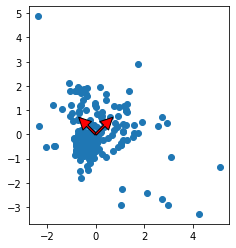

In [14]:
# Visualization code based on 
# https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib
import numpy as np

# Let's take our first two dimensions, as before
data = X[:, 0:2]

mu = data.mean(axis=0)
data = (data - mu)/data.std(axis=0)
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
for axis in eigenvectors:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

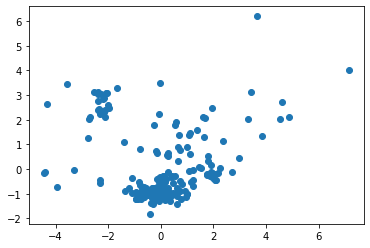

In [15]:
# Here is the transformed data along the first 2 components
plt.scatter(X2[:,0], X2[:,1])

## 2.1.2 How Many Components? Principal Components vs Explained Variance

How much does each component explain the variance?  We can look at the `explained_variance_ratio_` to tell...

In [16]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.27901819, 0.2277858 , 0.15609378, 0.12865138, 0.10155581,
       0.05862613, 0.04099538, 0.00709477, 0.00017876])

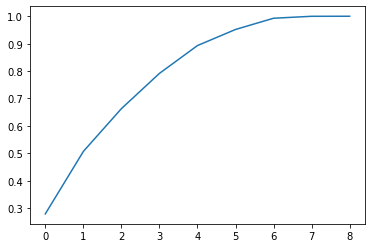

In [17]:
# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

... So, the first 6 components (of 9) gives 95% explained variance.  Not too bad!

## 2.1.3 Learning over PCA-Reduced Data

From the above, we saw how to do PCA on the overall dataset.  But let's do it more methodically as part of machine learning.  We'll start with separate training and test data.



In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.20, random_state=42)

# Fit the PCA on the training data
pca = PCA(n_components=6)
pca.fit(X_train)
# and transform it
X_train_2 = pca.transform(X_train)

# Then train a simple linear regression classifier
# (tries to find the best weighted linear combination to
# match the output)
regr = linear_model.LinearRegression()
regr.fit(X_train_2, y_train)

X_train_2

array([[-1.40712977, -0.5548499 ,  0.27978336, -0.19045658,  0.68459377,
         0.02754543],
       [ 0.97583006, -0.86557172,  0.42879509,  0.49226798, -1.77175323,
         0.24376956],
       [ 0.68750686,  0.14086061, -1.70529824, -3.08716943, -0.74135314,
        -0.04003752],
       ...,
       [-0.67637945, -0.83390501,  0.76929081, -0.46784216, -1.45750402,
        -0.02251824],
       [-0.03405592,  0.56315378, -1.04661605, -0.28054165, -0.20925479,
        -0.71265347],
       [ 0.49573744, -1.2931273 ,  0.7719564 , -1.45704714, -1.22898275,
         0.61543649]])

In [19]:
X_test_2 = pca.transform(X_test)

regr.predict(X_test_2)

regr.score(X_test_2, y_test)

0.873987227091783

So, 87.4% predictive accuracy on the test set.

How does that compare with working directly on the real data?

In [20]:
# Train and evaluate over non-dimensionality-reduced data
regr_full_data = linear_model.LinearRegression()
regr_full_data.fit(X_train, y_train)

regr_full_data.predict(X_test)
regr_full_data.score(X_test, y_test)

0.8557278202618007

## 2.1.4 PCA with Apache Spark

Thus far we've seen PCA and t-SNE using Scikit-Learn, which is fantastic for mid-sized data sets.

What if we have a really big Spark dataframe with our dataset?


In [21]:
!apt install libkrb5-dev
!pip install sparkmagic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.17-6ubuntu4.2).
libkrb5-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 KB 21.8 MB/s eta 0:00:00
  Installing build dependencies ... d

In [22]:
%load_ext sparkmagic.magics

In [23]:
%spark add -s my_session -l python -u http://ec2-3-91-74-45.compute-1.amazonaws.com:8998
# The above can connect to an EMR node running Spark + Livy, assuming the firewall is set to let anyone in

An error was encountered:
Error sending http request and maximum retry encountered.


In [ ]:
%%spark

import pandas as pd
from pyspark import SparkFiles

from pyspark.sql.types import StringType, IntegerType, DoubleType, StructField, StructType, ArrayType, MapType

# ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
schema = StructType([
        StructField("ID", IntegerType(), True),
        StructField("RefractiveIndex", DoubleType(), True),
        StructField("Na", DoubleType(), True),
        StructField("Mg", DoubleType(), True),
        StructField("Al", DoubleType(), True),
        StructField("Si", DoubleType(), True),
        StructField("K", DoubleType(), True),
        StructField("Ca", DoubleType(), True),
        StructField("Ba", DoubleType(), True),
        StructField("Fe", DoubleType(), True),
        StructField("Type", IntegerType(), True),
         ])

glass_sdf = spark.createDataFrame(\
                                  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'), \
                                  schema=schema)

glass_sdf.show(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+------------------+-----+----+----+-----+----+----+---+----+----+
| ID|   RefractiveIndex|   Na|  Mg|  Al|   Si|   K|  Ca| Ba|  Fe|Type|
+---+------------------+-----+----+----+-----+----+----+---+----+----+
|  2|1.5176100000000001|13.89| 3.6|1.36|72.73|0.48|7.83|0.0| 0.0|   1|
|  3|1.5161799999999999|13.53|3.55|1.54|72.99|0.39|7.78|0.0| 0.0|   1|
|  4|           1.51766|13.21|3.69|1.29|72.61|0.57|8.22|0.0| 0.0|   1|
|  5|           1.51742|13.27|3.62|1.24|73.08|0.55|8.07|0.0| 0.0|   1|
|  6|           1.51596|12.79|3.61|1.62|72.97|0.64|8.07|0.0|0.26|   1|
+---+------------------+-----+----+----+-----+----+----+---+----+----+
only showing top 5 rows

In [ ]:
%%spark

from pyspark.mllib.linalg import Vectors
from pyspark.mllib.linalg.distributed import RowMatrix

M = RowMatrix(glass_sdf.select('RefractiveIndex','Na','Mg','Al','Si','K','Ca','Ba','Fe').rdd.map(\
  lambda row: Vectors.dense(list(row.asDict().values()))))

pc = M.computePrincipalComponents(6)

projected = M.multiply(pc)

projected.rows.collect()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[DenseVector([-2.2414, -13.0845, 41.5609, -45.2941, 13.1599, -2.874]), DenseVector([-2.2496, -13.0844, 41.9784, -45.3113, 12.9424, -2.735]), DenseVector([-2.4224, -12.4907, 41.8856, -44.9697, 12.9633, -2.9404]), DenseVector([-2.3657, -12.7196, 42.194, -45.2626, 13.0373, -3.0094]), DenseVector([-2.3759, -12.6138, 42.4659, -44.8585, 12.7556, -2.7378]), DenseVector([-2.4419, -12.6604, 42.1774, -45.2893, 13.1049, -3.0937]), DenseVector([-2.4752, -12.5559, 42.3667, -45.354, 13.0878, -3.1702]), DenseVector([-2.5805, -12.7548, 40.9867, -44.9568, 13.2216, -2.833]), DenseVector([-2.6058, -12.4337, 42.2918, -45.0837, 12.9134, -2.9112]), DenseVector([-2.4888, -12.687, 42.6949, -44.9418, 12.7993, -2.8144]), DenseVector([-2.6618, -12.2078, 42.4148, -45.0426, 12.8882, -2.9864]), DenseVector([-2.4762, -12.7681, 42.6514, -45.0687, 12.9312, -2.9495]), DenseVector([-2.6146, -12.426, 42.5342, -45.1934, 12.8938, -2.9914]), DenseVector([-2.6684, -12.268, 42.7473, -45.1203, 12.8207, -2.975]), DenseVector([-

## 2.1.5 t-SNE

For high-dimensional data, we often use t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce dimensionality.  This is a stochastic method so it doesn't always produce the same output.

t-SNE isn't supported directly in Apache Spark (there is a 3rd party extension) but it's built into SciKit-Learn.

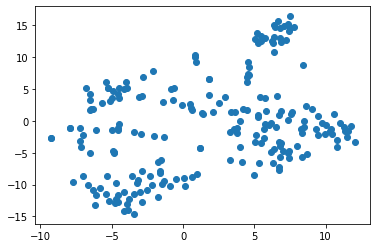

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1])

# 2.2 Clustering

## 2.2.1 k-Means Clustering

In [ ]:
# Let's take the data from X_embedded and try to choose a clustering!
X_embedded

array([[ -2.8509688 ,   3.8407674 ],
       [  4.00473   ,  -0.02244001],
       [  5.0354033 ,  -3.268447  ],
       [  5.279113  ,   0.9729654 ],
       [  7.587734  ,   1.1029699 ],
       [ -5.2162714 , -12.58785   ],
       [  7.6611576 ,   1.3505372 ],
       [ 10.594555  ,   1.0355572 ],
       [  0.4869503 ,   2.6800313 ],
       [ -1.4567728 ,  -9.978761  ],
       [ -4.7537637 , -12.94121   ],
       [ 10.348014  ,  -1.2602195 ],
       [ -4.5952153 , -12.796842  ],
       [ -2.9965928 , -11.161304  ],
       [ 11.490781  ,  -2.519173  ],
       [ 11.386934  ,  -1.6429449 ],
       [ 11.286578  ,  -1.0115668 ],
       [ -3.9153295 ,   5.1955853 ],
       [ -1.4198531 ,   3.0312915 ],
       [  0.9831101 ,  -8.277434  ],
       [ -3.4086652 , -11.527053  ],
       [ -5.419554  ,   6.0951195 ],
       [  9.308257  ,  -1.2752436 ],
       [  9.972816  ,  -1.9900852 ],
       [  6.7066355 ,   0.86977977],
       [  9.729544  ,  -0.38431844],
       [  5.232978  ,   0.5652696 ],
 

### The Algorithm, in Full Detail

Let's start with the basic algorithm.  We'll split it into three components:
1. The clustering coefficient or `error` function -- how far away are points?
2. The function to get the most appropriate cluster for a point, `get_nearest`.
3. The main K-Means algorithm.

For this version we will initialize with randomly chosen points in the dataset, then iteratively recompute until we reach convergence (which is detected when every point remains in its current cluster).

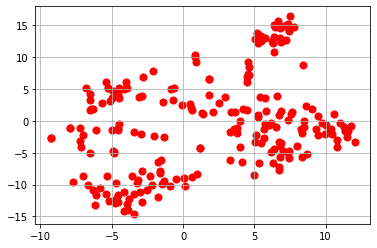

Initialized centroids to: 
[[ 0.98311007 -8.27743435]
 [ 6.79705286 -5.64121723]]
Iteration 1
Cluster 0
[-4.09569541 -4.76599222]
Cluster 1
[6.03096914 2.6301535 ]
Iteration 2
Cluster 0
[-3.94771593 -5.16411065]
Cluster 1
[5.84189876 2.85946385]
Iteration 3
Cluster 0
[-3.85614117 -5.39712319]
Cluster 1
[5.69838086 2.96118018]
Iteration 4
Cluster 0
[-3.83614143 -5.88643153]
Cluster 1
[5.38893825 3.02442069]
Iteration 5
Cluster 0
[-3.65045538 -6.43050478]
Cluster 1
[5.06392693 3.15988645]
Iteration 6
Cluster 0
[-3.49611485 -6.68686554]
Cluster 1
[4.90440793 3.2439075 ]
Iteration 7
Cluster 0
[-3.33387775 -6.83289629]
Cluster 1
[4.80560211 3.33284352]
Iteration 8
Cluster 0
[-3.27129238 -7.09813526]
Cluster 1
[4.64839319 3.33745456]
Iteration 9
Converged!


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from random import randint

def error(x,c):
  """
  Error (distance, clustering coefficient) between a point x
  and the centroid c.  We are using Euclidean distance, which
  can also be thought of as the sum of the squared error.
  """
  #err = 0
  #for i in range(len(x)):
  #  err = err + np.square(x[i] - c[i])

  err = np.linalg.norm(x - c)

  return err

def get_nearest(c_list, x):
  nearest = -1
  nearest_error = np.infty
  for i, v in enumerate(c_list):
    if error(x, v) < nearest_error:
      nearest_error = error(x, v)
      nearest = i
  return nearest

def kmeans(X, k, show):
  """
  Simple k-means algorithm
  """
  # Initialize the centroids to random points
  # in the data
  centroids = np.zeros((k,2))
  cluster_assignments = [0 for i in range(len(X))]
  for i in range(0, k):
    centroids[i] = X[randint(0, X.shape[0])]

  if show:
    print('Initialized centroids to: ')
    print(centroids)

  iteration = 1
  changed = True
  while changed:
    if show:
      print ('Iteration %d'%iteration)
      iteration = iteration + 1

    # Nothing happened in this iteration, by default    
    changed = False
    # Assign points to clusters
    for i,x in enumerate(X):
      nearest = get_nearest(centroids, x)
      # We changed a cluster mapping!
      if nearest != cluster_assignments[i]:
        changed = True
      cluster_assignments[i] = nearest

    if changed:
      # Recompute clusters
      for i in range(len(centroids)):
        points = [j for j,v in enumerate(cluster_assignments) if v == i]
        if show:
          print ('Cluster %d'%i)
        X_subset = np.array([[X[i,0],X[i,1]] for i in points])
        #if show:
        #  print (X_subset)

        if len(X_subset):
          centroids[i][0] = np.sum(X_subset[:, 0]) / len(points)
          centroids[i][1] = np.sum(X_subset[:, 1]) / len(points)
          print (centroids[i])
    elif show:
      print('Converged!')

  return (centroids, np.array(cluster_assignments))

  
k = 2
plt.scatter(X_embedded[:,0], X_embedded[:,1], c='red', marker='o', s=50)
plt.grid()
plt.show()
centroids, assignments = kmeans(X_embedded, k, True)

assignments

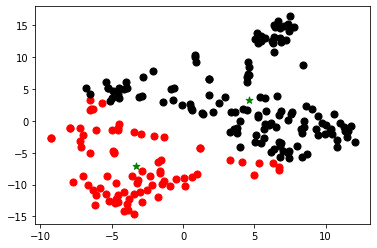

In [ ]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_embedded) if assignments[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_embedded) if assignments[i] == 1])

plt.scatter(clust0[:,0], clust0[:,1], c='red', marker='o', s=50)
plt.scatter(clust1[:,0], clust1[:,1], c='black', marker='o', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, c='g')

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(2, 'random', n_init=1, max_iter=300, random_state=0)
km.fit(X_embedded)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [ ]:
km.cluster_centers_

array([[-3.1983624, -7.360958 ],
       [ 4.4917874,  3.3328261]], dtype=float32)

In [ ]:
km.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

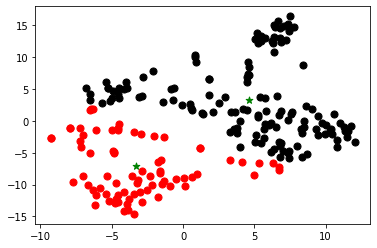

In [ ]:
# Plotting along with the Centroids
clust0 = np.array([x for i, x in enumerate(X_embedded) if km.labels_[i] == 0])
clust1 = np.array([x for i, x in enumerate(X_embedded) if km.labels_[i] == 1])

plt.scatter(clust0[:,0], clust0[:,1], c='red', marker='o', s=50)
plt.scatter(clust1[:,0], clust1[:,1], c='black', marker='o', s=50)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=50, c='g')

### 2.2.2 k-Means in SQL

For this one we'll use the college dataset from Kaggle.  Here we have both private and public universities, as well as many statistics.

The hope is that we can find 2 natural clusters.  Let's see!

In [ ]:
%%spark

import pandas as pd

# Sample data
km_data = pd.DataFrame(pd.read_csv('https://www.cis.upenn.edu/~zives/college-data.csv').reset_index())

km_data


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     index private   apps  accept  ...  s_f_ratio  perc_alumni  expend  grad_rate
0        0     Yes   1660    1232  ...       18.1           12    7041         60
1        1     Yes   2186    1924  ...       12.2           16   10527         56
2        2     Yes   1428    1097  ...       12.9           30    8735         54
3        3     Yes    417     349  ...        7.7           37   19016         59
4        4     Yes    193     146  ...       11.9            2   10922         15
..     ...     ...    ...     ...  ...        ...          ...     ...        ...
772    772      No   2197    1515  ...       21.0           14    4469         40
773    773     Yes   1959    1805  ...       13.3           31    9189         83
774    774     Yes   2097    1915  ...       14.4           20    8323         49
775    775     Yes  10705    2453  ...        5.8           49   40386         99
776    776     Yes   2989    1855  ...       18.1           28    4509         99

[777 rows x 19 

In [ ]:
%%spark

km_data_sdf = spark.createDataFrame(km_data)

km_data.info()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        777 non-null    int64  
 1   private      777 non-null    object 
 2   apps         777 non-null    int64  
 3   accept       777 non-null    int64  
 4   enroll       777 non-null    int64  
 5   top10perc    777 non-null    int64  
 6   top25perc    777 non-null    int64  
 7   f_undergrad  777 non-null    int64  
 8   p_undergrad  777 non-null    int64  
 9   outstate     777 non-null    int64  
 10  room_board   777 non-null    int64  
 11  books        777 non-null    int64  
 12  personal     777 non-null    int64  
 13  phd          777 non-null    int64  
 14  terminal     777 non-null    int64  
 15  s_f_ratio    777 non-null    float64
 16  perc_alumni  777 non-null    int64  
 17  expend       777 non-null    int64  
 18  grad_rate    777 non-null    int64  
dtypes: float

In [ ]:
%%spark

km_data.describe()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

            index          apps  ...        expend  grad_rate
count  777.000000    777.000000  ...    777.000000  777.00000
mean   388.000000   3001.638353  ...   9660.171171   65.46332
std    224.444871   3870.201484  ...   5221.768440   17.17771
min      0.000000     81.000000  ...   3186.000000   10.00000
25%    194.000000    776.000000  ...   6751.000000   53.00000
50%    388.000000   1558.000000  ...   8377.000000   65.00000
75%    582.000000   3624.000000  ...  10830.000000   78.00000
max    776.000000  48094.000000  ...  56233.000000  118.00000

[8 rows x 18 columns]

In [ ]:
%%spark

k = 2
km_data_sdf.createOrReplaceTempView('km_data')

def initialize():
  ######################
  ## Initialize clusters.  It's better to do this randomly, but we'll use the
  ## first k=2 rows
  km_cluster_centroids_sdf = spark.sql("""
            (SELECT index as cluster_id,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
            FROM km_data k ORDER BY index LIMIT
            """ + ' ' + str(k) + ')')

  km_cluster_centroids_sdf.show(1)
  km_cluster_centroids_sdf.createOrReplaceTempView('km_cluster_centroids')
  return km_cluster_centroids_sdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark

def assign_clusters():
      # Distance between each point & each centroid
    km_data_to_cluster_dist_sdf =\
      spark.sql("""
                SELECT c.cluster_id,k.index,(pow(c.apps - k.apps, 2)+
                                              pow(c.accept - k.accept, 2)+
                                              pow(c.enroll - k.enroll, 2)+
                                              pow(c.top10perc - k.top10perc, 2)+
                                              pow(c.top25perc - k.top25perc, 2)+
                                              pow(c.f_undergrad - k.f_undergrad, 2)+
                                              pow(c.p_undergrad - k.p_undergrad, 2)+
                                              pow(c.outstate - k.outstate, 2)+
                                              pow(c.room_board - k.room_board, 2)+
                                              pow(c.personal - k.personal, 2)+
                                              pow(c.phd - k.phd, 2)+
                                              pow(c.terminal - k.terminal, 2)+
                                              pow(c.s_f_ratio - k.s_f_ratio, 2)+
                                              pow(c.perc_alumni - k.perc_alumni, 2)+
                                              pow(c.expend - k.expend, 2)+
                                              pow(c.grad_rate - k.grad_rate, 2)
                ) as dist
                FROM km_cluster_centroids c CROSS JOIN km_data k
                """)
    km_data_to_cluster_dist_sdf.createOrReplaceTempView('km_data_to_cluster_dist')

    # SparkSQL is very limited in subqueries.  We want for each index,
    # the cluster_id which minimizes the cluster distance.  We do two steps for
    # each data item: (1) find the shortest distance to ANY cluster ID, 
    # (2) find the cluster ID whose distance equals the shortest distance.
    km_data_to_cluster_best_dist_sdf = spark.sql('''
              SELECT index,min(dist) as dist
              FROM km_data_to_cluster_dist
              GROUP BY index''')
    km_data_to_cluster_best_dist_sdf.createOrReplaceTempView('km_data_to_cluster_best_dist')

    km_data_to_cluster_sdf = spark.sql('''
              SELECT kd.index, kd.cluster_id
              FROM km_data_to_cluster_dist kd JOIN km_data_to_cluster_best_dist kb
                ON kd.index = kb.index
              WHERE kd.dist = kb.dist''')
    km_data_to_cluster_sdf.createOrReplaceTempView('km_data_to_cluster')
    km_data_to_cluster_sdf.show(1)
    return km_data_to_cluster_sdf


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark
def compute_centroids():
  km_clusters_sdf = spark.sql('''
            SELECT cluster_id,AVG(apps) AS apps,AVG(accept) AS accept,
               AVG(enroll) AS enroll,AVG(top10perc) AS top10perc, 
               AVG(top25perc) AS top25perc,AVG(f_undergrad) AS f_undergrad, 
               AVG(p_undergrad) AS p_undergrad,AVG(outstate) AS outstate, 
               AVG(room_board) AS room_board,AVG(books) AS books, 
               AVG(personal) AS personal,AVG(phd) AS phd, 
               AVG(terminal) AS terminal,AVG(s_f_ratio) AS s_f_ratio, 
               AVG(perc_alumni) AS perc_alumni,AVG(expend) AS expend, 
               AVG(grad_rate) AS grad_rate
            FROM km_data_to_cluster kc JOIN km_data kd ON kc.index = kd.index
            GROUP BY kc.cluster_id
            ''')  
  km_clusters_sdf.createOrReplaceTempView('km_cluster_centroids')
  km_clusters_sdf.show(1)
  return km_clusters_sdf

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
%%spark

max_iter = 1
print('Initial data:')
spark.sql('select * from km_data').show(5)
print('Initial cluster centroids:')
km_cluster_centroids_sdf = initialize()
km_cluster_centroids_sdf.show()
for i in range(max_iter):
  km_data_to_cluster_sdf = assign_clusters()
  # print ('Data-cluster assignments')
  # spark.sql('select * from km_data_to_cluster order by index').show(5)
  km_cluster_centroids_sdf = compute_centroids()
  # print ('New cluster centroids')
  # spark.sql('select * from km_cluster_centroids').show()

km_cluster_centroids_sdf.explain()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Initial data:
+-----+-------+----+------+------+---------+---------+-----------+-----------+--------+----------+-----+--------+---+--------+---------+-----------+------+---------+
|index|private|apps|accept|enroll|top10perc|top25perc|f_undergrad|p_undergrad|outstate|room_board|books|personal|phd|terminal|s_f_ratio|perc_alumni|expend|grad_rate|
+-----+-------+----+------+------+---------+---------+-----------+-----------+--------+----------+-----+--------+---+--------+---------+-----------+------+---------+
|    0|    Yes|1660|  1232|   721|       23|       52|       2885|        537|    7440|      3300|  450|    2200| 70|      78|     18.1|         12|  7041|       60|
|    1|    Yes|2186|  1924|   512|       16|       29|       2683|       1227|   12280|      6450|  750|    1500| 29|      30|     12.2|         16| 10527|       56|
|    2|    Yes|1428|  1097|   336|       22|       50|       1036|         99|   11250|      3750|  400|    1165| 53|      66|     12.9|         30|  8735| 

## 2.2.3 MLlib

In [ ]:
%%spark
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler


# Convert from dataframe features to a "features" column that is a vector
vecAssembler = VectorAssembler(inputCols=['apps','accept','enroll',\
                                          'top10perc','top25perc','f_undergrad',\
                                          'p_undergrad','outstate','room_board',\
                                          'books','personal','phd','terminal',\
                                          's_f_ratio','perc_alumni','expend',\
                                          'grad_rate'], outputCol="features")
df_kmeans = vecAssembler.transform(km_data_sdf).select('index', 'features')
df_kmeans.show()

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(5)

model = kmeans.fit(df_kmeans)

predictions = model.transform(df_kmeans)
predictions.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+
|index|            features|
+-----+--------------------+
|    0|[1660.0,1232.0,72...|
|    1|[2186.0,1924.0,51...|
|    2|[1428.0,1097.0,33...|
|    3|[417.0,349.0,137....|
|    4|[193.0,146.0,55.0...|
|    5|[587.0,479.0,158....|
|    6|[353.0,340.0,103....|
|    7|[1899.0,1720.0,48...|
|    8|[1038.0,839.0,227...|
|    9|[582.0,498.0,172....|
|   10|[1732.0,1425.0,47...|
|   11|[2652.0,1900.0,48...|
|   12|[1179.0,780.0,290...|
|   13|[1267.0,1080.0,38...|
|   14|[494.0,313.0,157....|
|   15|[1420.0,1093.0,22...|
|   16|[4302.0,992.0,418...|
|   17|[1216.0,908.0,423...|
|   18|[1130.0,704.0,322...|
|   19|[3540.0,2001.0,10...|
+-----+--------------------+
only showing top 20 rows

+-----+--------------------+----------+
|index|            features|prediction|
+-----+--------------------+----------+
|    0|[1660.0,1232.0,72...|         0|
|    1|[2186.0,1924.0,51...|         0|
|    2|[1428.0,1097.0,33...|         0|
|    3|[417.0,349.0,137....|         0

## 2.2.4 Choosing the Right *k* for Clustering

To pick the right value of *k* for our data, we will search the space of possible values -- looking at the smallest one that (roughly) minimizes the sum squared error (Euclidean distance), aka the distortion.

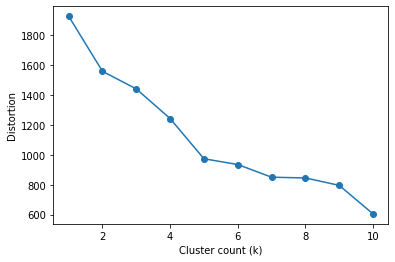

In [ ]:
distortions = []

max_k = 10
for i in range(1,max_k+1):
  km = KMeans(n_clusters=i,
              init='random',
              n_init=1,
              max_iter=300,
              random_state=0)
  km.fit(X)
  # The distortion is called inertia in SciKit
  distortions.append(km.inertia_)

plt.plot(range(1,max_k+1), distortions, marker='o')
plt.xlabel('Cluster count (k)')
plt.ylabel('Distortion')
plt.show()

## 2.2.5 Hierarchical Clustering

A different approach to clustering is based on agglomeration, i.e., repeatedly building up clusters.

Here let's cluster vehicles by their specs.

In [ ]:
import pandas as pd
import numpy as np

vehicles_df = pd.DataFrame([# For fun, try this one...
                            # {'vehicle':'la-class-submarine', 
                            #  'engine_type': 'nuclear', 
                            #  'hp': 35000,
                            #  'weight': 6927},
                            {'vehicle':'ram-promaster',
                             'engine_type':'v6',
                             'hp':280,
                             'weight': 4.25},
                            {'vehicle':'ford-f150',
                             'engine_type':'v6',
                             'hp':375,
                             'weight': 3},
                            {'vehicle':'chevrolet-silverado',
                             'engine_type':'v6',
                             'hp': 285,
                             'weight': 3.5},
                            {'vehicle':'toyota-camry',
                             'engine_type':'i4',
                             'hp': 206,
                             'weight': 1.5},
                            {'vehicle':'mazda-cx30',
                             'engine_type':'i4',
                             'hp': 186,
                             'weight':1.5}])

vehicles_df

,vehicle,engine_type,hp,weight
0,ram-promaster,v6,280,4.25
1,ford-f150,v6,375,3.00
2,chevrolet-silverado,v6,285,3.50
3,toyota-camry,i4,206,1.50
4,mazda-cx30,i4,186,1.50


Note that the vehicle type won't really be a feature but rather an instance identifier.  What about `engine_type`?

We could consider one-hot encoding it, but that essentially ignores the fact that an inline-4 and a V6 engine are closely related (one has 4 cylinders, the other 6).  Maybe instead we should replace the `engine_type` with `engine_cyl`.

In [ ]:
revised_df = vehicles_df
revised_df['engine_cyl'] = revised_df['engine_type'].map(lambda x: 6 if x == 'v6' else 4)
revised_df.drop(columns='engine_type',inplace=True)
revised_df = revised_df.set_index('vehicle')
revised_df

,hp,weight,engine_cyl
vehicle,,,
ram-promaster,280,4.25,6
ford-f150,375,3.00,6
chevrolet-silverado,285,3.50,6
toyota-camry,206,1.50,4
mazda-cx30,186,1.50,4


Now we want to create a distance matrix, which is a square matrix storing the distances between each pair of items.  We'll use Euclidean distance.

In [ ]:
# pdist computes pairwise distances
# squareform converts 1D distance vector to square-form distance matrix
from scipy.spatial.distance import pdist, squareform
row_dist_df = pd.DataFrame(squareform(pdist(revised_df, metric='euclidean')),
                           columns=revised_df.index.to_list(), index=revised_df.index.to_list())

In [ ]:
row_dist_df

,ram-promaster,ford-f150,chevrolet-silverado,toyota-camry,mazda-cx30
ram-promaster,0.000000,95.008223,5.055937,74.078084,94.061483
ford-f150,95.008223,0.000000,90.001389,169.018490,189.016534
chevrolet-silverado,5.055937,90.001389,0.000000,79.050617,99.040396
toyota-camry,74.078084,169.018490,79.050617,0.000000,20.000000
mazda-cx30,94.061483,189.016534,99.040396,20.000000,0.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


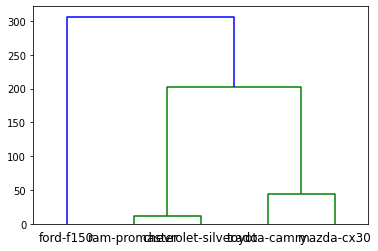

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# Create the clusters
row_clusters = linkage(row_dist_df, method='complete')

# Plot them in a dendrogram
plt.figure()
dn=hierarchy.dendrogram(row_clusters,labels=revised_df.index.to_list())